# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

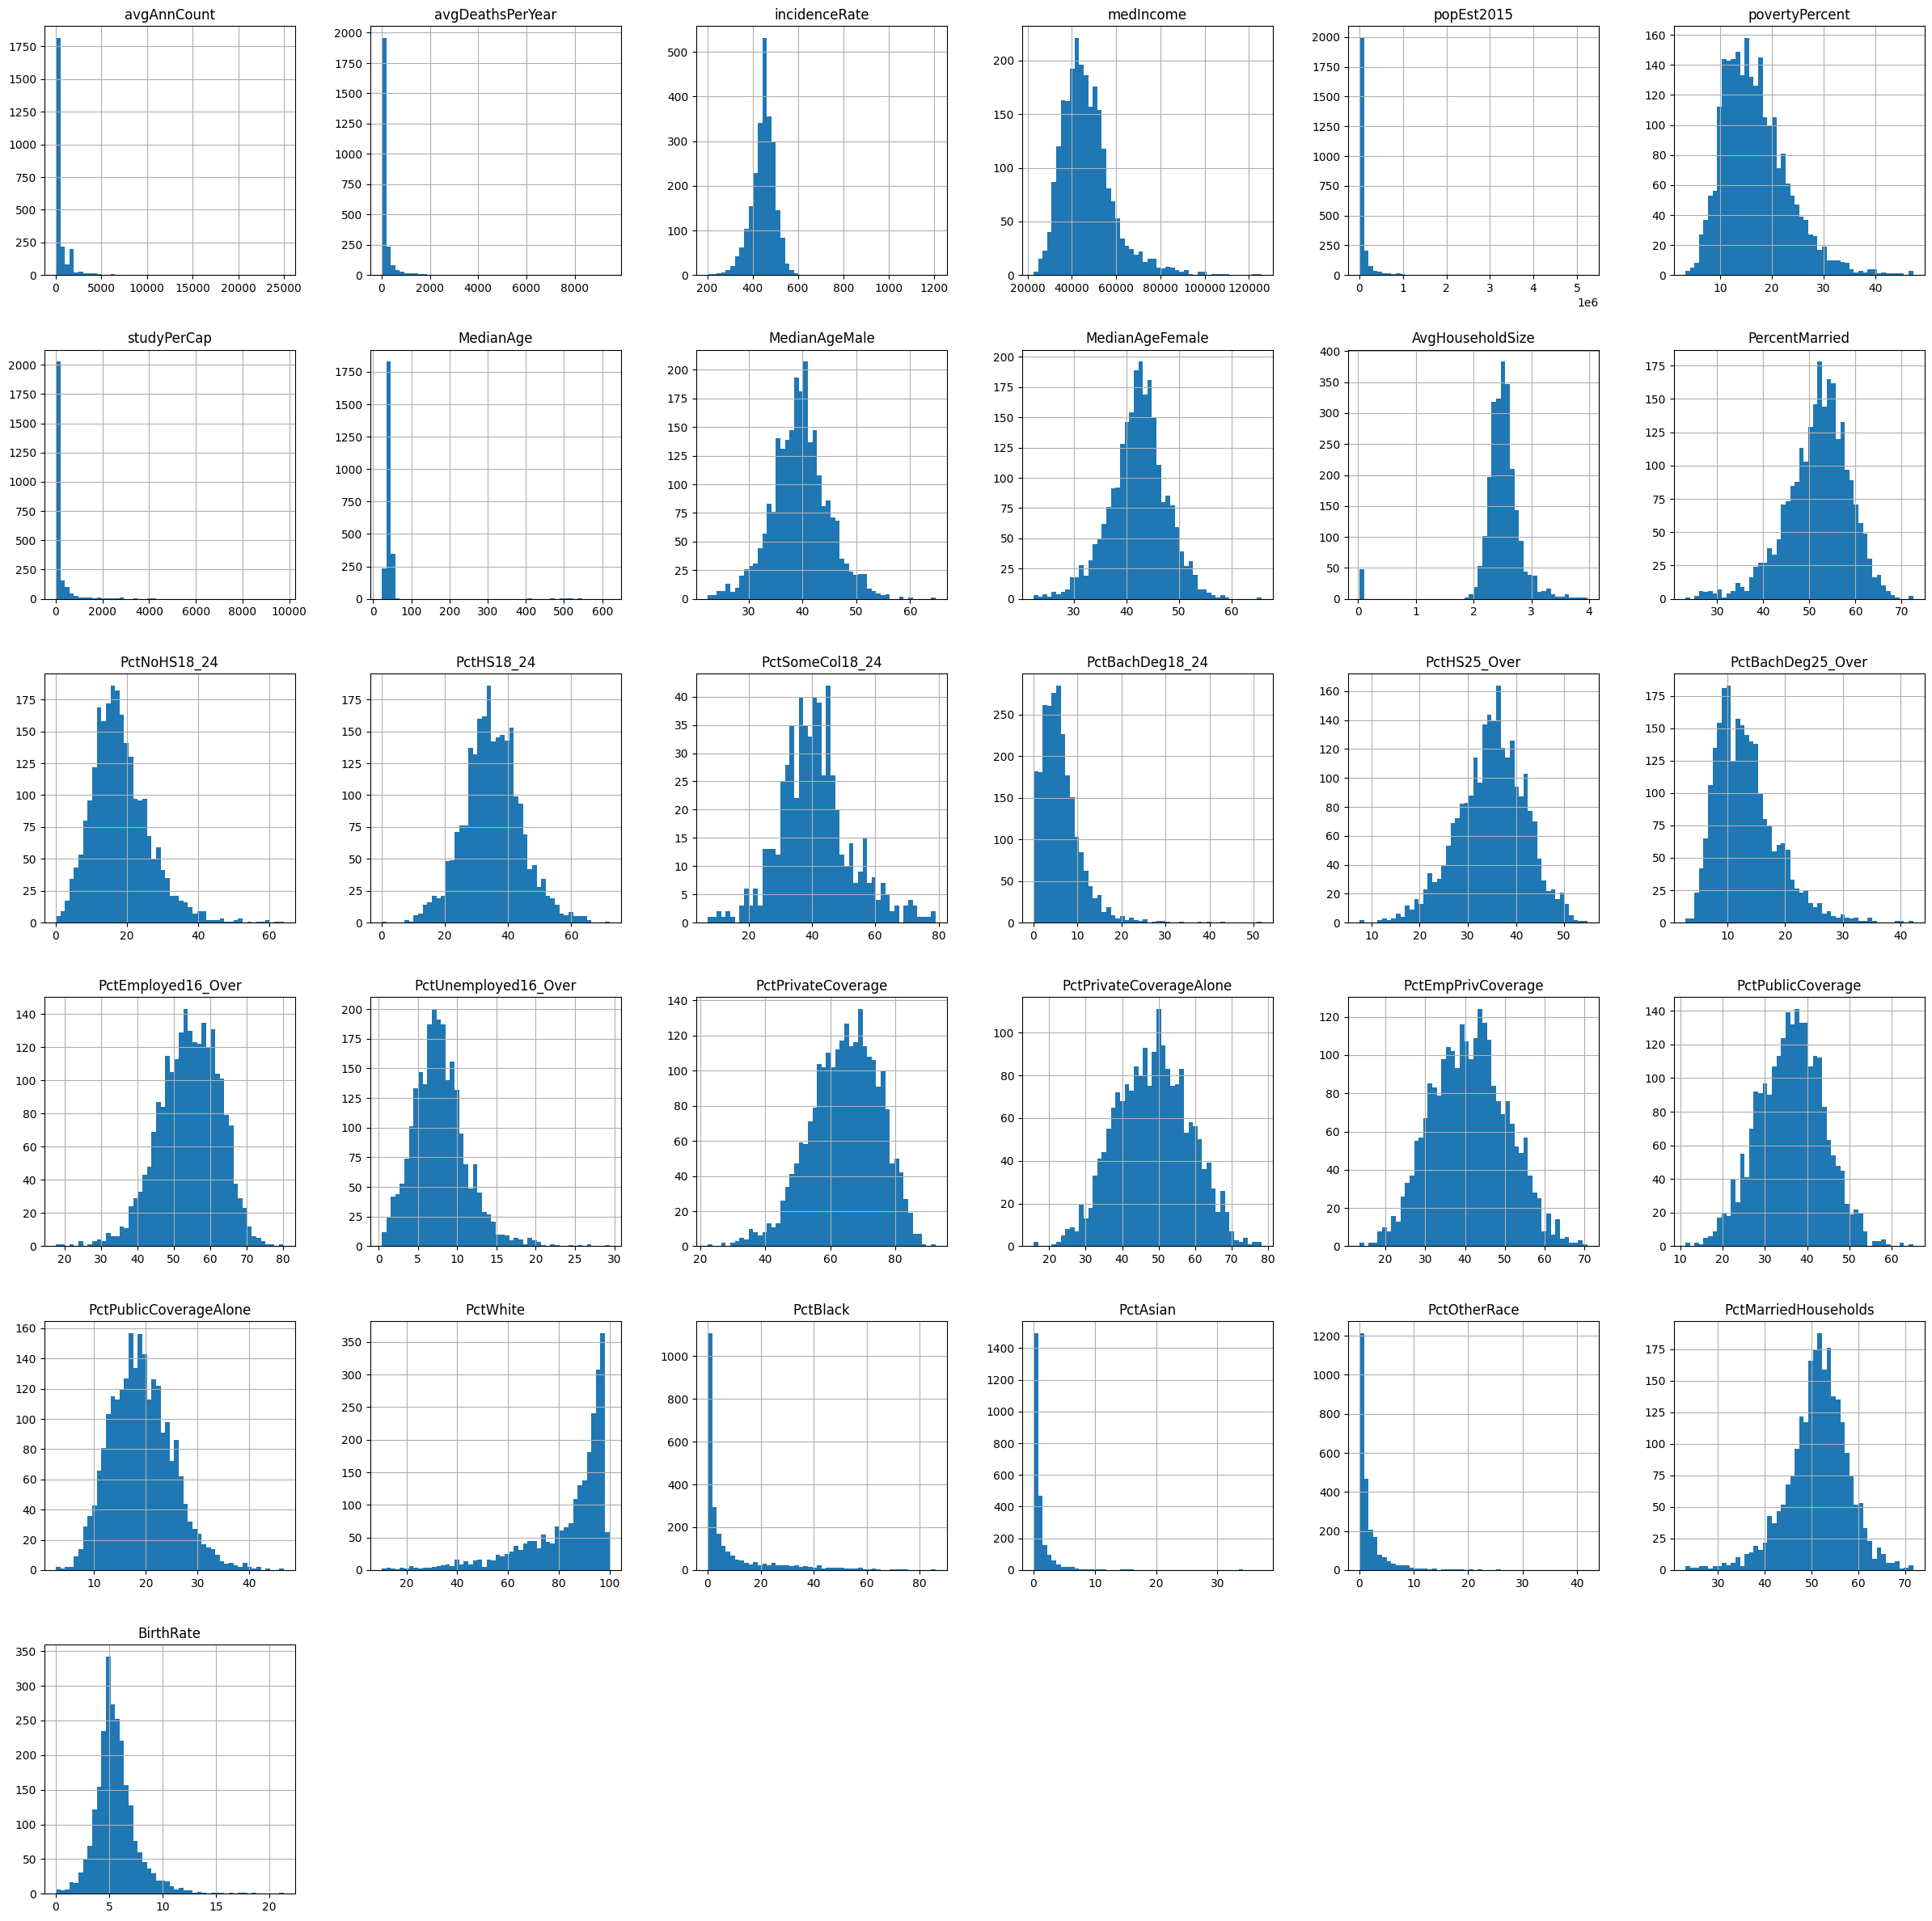

In [4]:
# Plot histograms to visualize all data
%matplotlib inline
cancer_data = pd.read_csv(training_data_path)
cancer_data.hist(bins=50,figsize=(30,30))

array([[<AxesSubplot: title={'center': 'TARGET_deathRate'}>]],
      dtype=object)

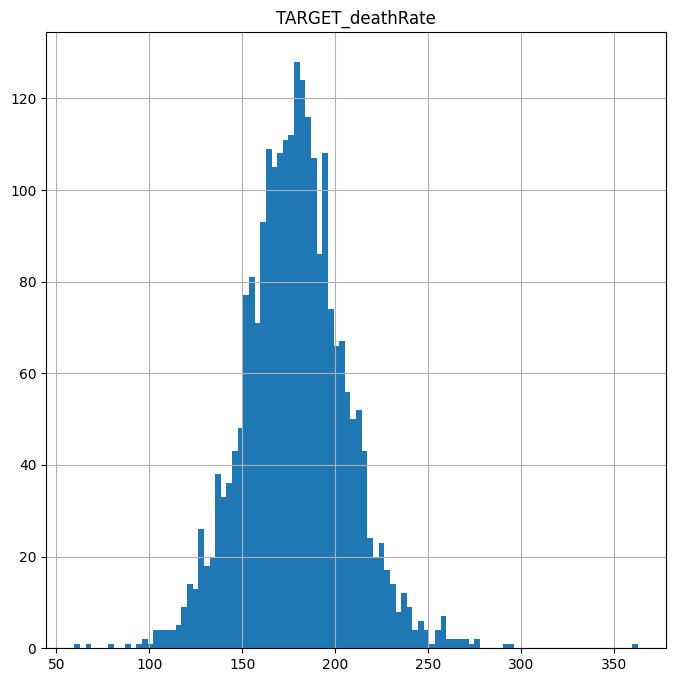

In [5]:
target = "TARGET_deathRate"
target_data = pd.read_csv(training_targets_path)
target_data.hist(bins=100,figsize=(8,8))

In [6]:
# Further checks
from tabulate import tabulate

data_table = []
head = ["Column name", "Mean", "Standard deviation", "#entries>3std", "#entries<3std", "#entries>5std", "#entries<5std"]

# Find entries that are outside of the standard deviation
for column in cancer_data:
    mean = cancer_data[column].mean()
    std = cancer_data[column].std()
    count_above_std3 = 0
    count_below_std3 = 0
    count_above_std5 = 0
    count_below_std5 = 0

    for entry in cancer_data[column]:
        if entry < mean - std*3:
            count_below_std3 += 1
        elif entry > mean + std*3:
            count_above_std3 += 1

        if entry < mean - std*5:
            count_below_std5 += 1
        elif entry > mean + std*5:
            count_above_std5 += 1

    data_table.append([column, mean, std, count_above_std3, count_below_std3, count_above_std5, count_below_std5]) # add data for every column

print(tabulate(data_table, headers=head, tablefmt="grid"))

+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| Column name             |         Mean |   Standard deviation |   #entries>3std |   #entries<3std |   #entries>5std |   #entries<5std |
+=========================+==============+======================+=================+=================+=================+=================+
| avgAnnCount             |    598.333   |          1288.68     |              36 |               0 |              18 |               0 |
+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| avgDeathsPerYear        |    183.717   |           456.439    |              43 |               0 |              20 |               0 |
+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| incidenceRate           |    447

In [7]:
# Incorrect data
count_entries_above66 = 0

for entry in cancer_data['MedianAge']:
    if entry > 66:
        count_entries_above66 += 1

print('The total number of entries above 66 years in MedianAge is', count_entries_above66)

The total number of entries above 66 years in MedianAge is 26


In [8]:
cancer_data.isna().sum().sort_values(ascending = False) # check for missing data

PctSomeCol18_24            1829
PctPrivateCoverageAlone     483
PctEmployed16_Over          119
avgAnnCount                   0
PctHS25_Over                  0
PctMarriedHouseholds          0
PctOtherRace                  0
PctAsian                      0
PctBlack                      0
PctWhite                      0
PctPublicCoverageAlone        0
PctPublicCoverage             0
PctEmpPrivCoverage            0
PctPrivateCoverage            0
PctUnemployed16_Over          0
PctBachDeg25_Over             0
PctBachDeg18_24               0
avgDeathsPerYear              0
PctHS18_24                    0
PctNoHS18_24                  0
PercentMarried                0
AvgHouseholdSize              0
MedianAgeFemale               0
MedianAgeMale                 0
MedianAge                     0
studyPerCap                   0
povertyPercent                0
popEst2015                    0
medIncome                     0
incidenceRate                 0
BirthRate                     0
dtype: i

There are a few columns that contain unusual data:
- The highest median age for male is 64.7, and the highest medial age for female is 65.7. In the 'MedianAge' column there are 26 entries that are above 66 year, all of them being in the 100th scale. These entries are clearly a mistake and they should be replaced;
- In an usual Gaussian Distribution, data that is outside of 3 standard deviations is very rare and, therefore, can be replaced from the machine learning pipeline. In this exercise, due to the data size limitation, only values that are above or below 5 std will be replaced:
  - The AvgHouseholdSize has 48 entries that are below 5 standard deviation;
  - A few entries for PctNoHS18_24 (3), PctBachDeg18_24 (8), PctBachDeg25_Over (3), PctUnemployed16_Over (4);
  - The other cathegories that show high strandard deviations are PctBlack, PctAsian and PctOtherRace, but they are not Gaussian distributed.

Most columns have 2438 entries, but some do not:
- Given that PctSomeCol18_24 misses approximatly 75% of data (only 609 non-null values out of 2438), it should be removed from the Machine Learning Pipeline; 
- PctEmployed16_Over has null values in 119 positions. In the Machine Learning Pipeline, these values can be replaced by mean value becasue the PctEmployed16_Over is Gaussian distributed;
- About 80% of PctPrivateCoverageAlone entries contain a value so more consideration has to be place in the removal or substitution of the cathegory. Given that the values are Gaussian distributed, there is a clear trend for data that allows us to replace the values in a safer way with the mean. 

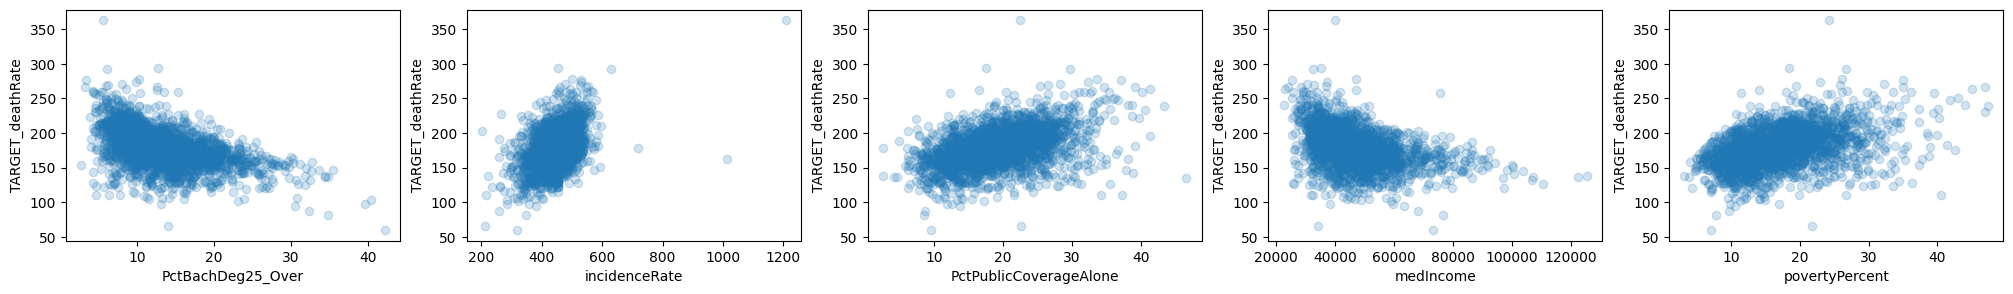

In [7]:
# Corelation
full_data = cancer_data.copy()
full_data.insert(1, target, target_data)

corr_matrix=full_data.corr()
correlation = corr_matrix[target].abs().sort_values(ascending=False) # take the abs value to account for negative corelation
high_correclation = correlation[1:6].index
incr = 0

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 3))

for feature in high_correclation:
   axes[incr].scatter(x=full_data[feature], y=full_data[target].values, alpha=0.2, )
   axes[incr].set_xlabel(feature)
   axes[incr].set_ylabel(target)
   incr += 1

In [8]:
print(correlation)

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0

In the tables above, the first five best correlation tables can be observed. It can be seen how the cancer average death rate is associated to these values. For example, there is a linear relation between the death due to cancer and the population number. The population estimate in 2015 and the average annual population have a similar trend, so they can be transformed to create  hyper figure.

There is a variation cap around 0. Why is the data flat at that value? Cancer death is actually not affected by the fact that people have a degree or not. 

In [9]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [10]:
from enum import Enum

class Strategy(Enum):
    SIMPLE: int = 1
    COMPLEX: int = 2

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import pandas as pd

class FilterData:

    def __init__(self, data, strategy = Strategy.SIMPLE, strat_column = False):
        self.strategy = strategy
        self.data = data
        self.train_set = pd.DataFrame()
        self.test_set = pd.DataFrame()
        self.strat_col = strat_column

        # Filter data
        #self.drop()
        self.replace_high_std()
        self.split_data()


    # split train/test sets based on the strategy
    def split_data(self):
        if self.strategy == Strategy.SIMPLE:
            self.train_set, self.test_set = train_test_split(self.data, test_size= 0.3, random_state=42)
        else:
            split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

            if (self.strat_col in self.data):
                for train_index, test_index in split.split(self.data, self.data[self.strat_col]): # MedianAge
                    self.train_set = self.data.loc[train_index]
                    self.test_set = self.data.loc[test_index]
            else:
                self.train_set, self.test_set = train_test_split(self.data, test_size= 0.3, random_state=42)


    # drop columns that miss mora than 50% of the data
    def drop(self):
        data_len = len(self.data.axes[0])

        for column in self.data:
            if self.data[column].isnull().any():
                if self.data[column].notnull().sum() < (data_len/2):
                    self.data = self.data.drop(column,axis=1)


    # replace data that is outside 3 or 6 standard deviations
    def replace_high_std(self):
        for column in self.data:
            mean = self.data[column].mean()
            std = self.data[column].std()
            
            # for 3 or 5 std depending on the strategy
            for entry in self.data[column]:
                if self.strategy == Strategy.SIMPLE:
                    if ((mean - std*5) >= entry) or ((mean + std*5) <= entry ):
                        entry = mean
                else:
                    if ((mean - std*3) >= entry) or ((mean + std*3) <= entry ):
                        entry = mean

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

def preprocess(self, strategy, strat_column):
    drop(self)
    replace_high_std(self, strategy)
    train, test = split_data(self, strategy, strat_column)
    return train, test


def drop(data):
        data_len = len(data.axes[0])

        for column in data:
            if data[column].isnull().any():
                if data[column].notnull().sum() < (data_len/2):
                    data = data.drop(column,axis=1)


def replace_high_std(data, strategy):
    for column in data:
            mean = data[column].mean()
            std = data[column].std()
            
            # for 3 or 5 std depending on the strategy
            for entry in data[column]:
                if strategy == Strategy.SIMPLE:
                    if ((mean - std*5) >= entry) or ((mean + std*5) <= entry ):
                        entry = mean
                else:
                    if ((mean - std*3) >= entry) or ((mean + std*3) <= entry ):
                        entry = mean


def split_data(data, strategy = Strategy.SIMPLE, strat_column = None):
    if strategy == Strategy.SIMPLE:
        train_set, test_set = train_test_split(data, test_size= 0.3, random_state=42)
    else:
        split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

        if (strat_column in data):
            for train_index, test_index in split.split(data, data[strat_column]): # MedianAge
                train_set = data.loc[train_index]
                test_set = data.loc[test_index]
        else:
            train_set, test_set = train_test_split(data, test_size= 0.3, random_state=42)

    return train_set, test_set


In [22]:
#full_data = cancer_data[high_correclation].copy()
full_data=cancer_data.copy()
full_data.insert(1, target, target_data)

train_set, test_set = preprocess(full_data, Strategy.SIMPLE, None)

cancer_train = train_set.drop(target, axis=1)
cancer_train_target = train_set[target].copy()

cancer_test = test_set.drop(target, axis=1)
cancer_test_target = test_set[target].copy()

In [23]:
from sklearn.base import BaseEstimator

class SelectAttributes(BaseEstimator):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('slc_attribs',SelectAttributes(list[cancer_train])),
    ('imputer',SimpleImputer(strategy="mean"))
    #('std_scaler',StandardScaler())
])

In [25]:
cancer_prepared = pipeline.fit_transform(cancer_train)
test_prepared = pipeline.fit_transform(cancer_test)

cancer_prepared.shape

(1706, 31)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [26]:
# OLS model
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(cancer_prepared, cancer_train_target)
prediction = lin_reg.predict(test_prepared)

print('Score for training data ', lin_reg.score(cancer_prepared, cancer_train_target))
print('Score for test data ', lin_reg.score(test_prepared, cancer_test_target))

Score for training data  0.5268233442176912
Score for test data  0.5219555157448872


In [27]:
from sklearn.linear_model import LassoCV

lasso = LassoCV() # Lasso Cross validation
lasso.fit(cancer_prepared, cancer_train_target)

print('Score for training data ', lasso.score(cancer_prepared, cancer_train_target))
print('Score for test data ', lasso.score(test_prepared, cancer_test_target))
print('Best alpha', lasso.alpha_)

print(cancer_prepared.shape)
print(cancer_train_target.shape)
print(test_prepared.shape)
print(cancer_test_target.shape)

Score for training data  0.17851717009144707
Score for test data  0.1626559451273395
Best alpha 916.7146897686118
(1706, 31)
(1706,)
(732, 31)
(732,)


In [18]:
# Ridge model
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV() # Ridge Cross validation
ridge_model.fit(cancer_prepared, cancer_train_target)

print('Score for training data ', ridge_model.score(cancer_prepared, cancer_train_target))
print('Score for test data ', ridge_model.score(test_prepared, cancer_test_target))
print('Best alpha', ridge_model.alpha_)

Score for training data  0.5268163564551873
Score for test data  0.5217961568065477
Best alpha 10.0


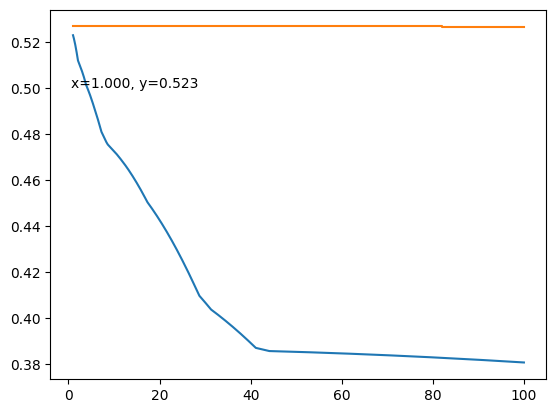

In [25]:
# Find alpha value
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

alpha_values = np.linspace(1.,100.,num=1000)
lasso_s = []
ridge_s = []

for alpha_val in alpha_values:
    lasso_m = Lasso(alpha=alpha_val)
    lasso_m.fit(cancer_prepared, cancer_train_target)
    lasso_s.append(lasso_m.score(cancer_prepared, cancer_train_target))

    ridge_m = Ridge(alpha=alpha_val)
    ridge_m.fit(cancer_prepared, cancer_train_target)
    ridge_s.append(ridge_m.score(cancer_prepared, cancer_train_target))

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.5,0.5))

fig, ax = plt.subplots()
ax.plot(alpha_values,lasso_s)
ax.plot(alpha_values,ridge_s)
annot_max(alpha_values,np.array(lasso_s))
plt.show()

L1 Regularization:
$$
L(w) = {\frac{1}{2n}} \sum^n_{i=1} (y_i - Xw)^2 + \alpha \sum^n_{j=1} w
$$

In [21]:
# Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1)
lasso_model.fit(cancer_prepared, cancer_train_target)

print('Score for training data ', lasso_model.score(cancer_prepared, cancer_train_target))
print('Score for test data ', lasso_model.score(test_prepared, cancer_test_target))

Score for training data  0.5230171532765799
Score for test data  0.5272194721345826


L2 Regularization:
$$
L(w) = \sum^n_{i=1} (y_i - Xw)^2 + \alpha w^2
$$

In [33]:
# Ridge model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=100)
ridge_model.fit(cancer_prepared, cancer_train_target)

print('Score for training data ', ridge_model.score(cancer_prepared, cancer_train_target))
print('Score for test data ', ridge_model.score(test_prepared, cancer_test_target))
print(ridge_model.coef_)

Score for training data  0.5268126958233909
Score for test data  0.5223873786615726
[-3.77778400e-03  2.03744069e-02  1.91367500e-01  1.31200240e-04
 -1.76811463e-05  3.48129026e-01  7.57171814e-04 -3.20925430e-03
 -4.71417501e-01 -1.28209297e-01 -1.91306106e-01  1.17436718e+00
 -1.76697204e-01  2.37530541e-01 -2.64060138e-02 -6.83537416e-02
  3.10221086e-01 -1.52750972e+00 -4.12112057e-01 -1.59022363e-01
 -6.12143698e-01  7.00540154e-02  3.66820408e-01 -2.01770591e-01
  3.19574771e-01 -1.85597237e-01 -1.43835960e-01 -1.56654178e-02
 -9.92255175e-01 -1.23571013e+00 -1.37555185e+00]


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [27]:
lasso_model.coef_

array([-0.        , -0.        ,  9.95885847, -0.        , -0.        ,
        1.79304157,  0.        , -0.        , -0.69922835, -0.26117551,
       -0.        , -0.        , -0.        ,  1.85010501, -0.        ,
        1.91706372, -6.85764737, -0.        ,  0.03162928, -2.58954827,
       -0.        ,  0.        ,  0.        ,  1.50390822, -0.        ,
        0.        ,  0.        , -2.07483098, -2.01968   , -1.51488607])

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [20]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions